# 1. Jupyter Notebook and NumPy Warmup [20pts]

We will make extensive use of Python's numerical arrays (NumPy) and interactive plotting (Matplotlib) in Jupyter notebooks for the course assignments. The first part of this assignment is intended as a gentle warm up in case you haven't used these tools before. Start by reading through the following tutorials:

If you haven't used Jupyter before, a good place to start is with the introductory documentation here:


https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#starting-the-notebook-server
https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb
https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Running%20Code.ipynb


This page gives a good introduction to NumPy and many examples of using NumPy along with Matplotlib:

http://scipy-lectures.org/intro/numpy/array_object.html


You should also get comfortable with searching through the documentation as needed

https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

---


---

Please enter your name and SID here (click cell to edit)

**Name: Humza Munir**

**SID: 69142425 (munirh)**

---

### NumPy Array Operations

Describe in words what each of each of the following statements does and what the value of `result` will be (i.e. if you were to execute `print(result)`). You should do this with out actually executing the code but instead just looking it and refering to the NumPy documentation. 

***
**[1.1]**

```
import numpy as np
a = np.arange(5,15)
result = a[::3]
```

[5 8 11 14]

***
**[1.2]**

```
a = np.arange(1,5)
result = a[::-1]
```

[4 3 2 1]

***
**[1.3]**

```
f = np.arange(1840,1860)
g = np.where(f>1850)
result = f[g]
```

[1851 1852 1853 1854 1855 1856 1857 1858 1859]

***
**[1.4]**

```
x = np.ones((1,10))
result = x.sum(axis=1)
```

[10.]


---

## NumPy Coding Exercises

Add or modify the code in the cells below as needed to carry out the following steps.

**[1.5]**

Use **matplotlib.pyplot.imread** to load in a grayscale image of your choice. If you don't have a grayscale image handy, load in a color image and then convert it to grayscale averaging together the three color channels (use **numpy.mean**).

Finally create an array A that contains the pixels in a 100x100 sub-region of your image and display the image in the notebook using the **matplotlib.pyplot.imshow** function. 

**HINT:** When loading an image with **imread** it is important to example the data type of the returned array. Depending on the image it may be that `I.dtype = uint8` or `I.dtype = float32`. Integer values range in [0..255] while floating point values for an image will be in [0..1].  A simple approach is to always convert images to floats, this will avoid much confusion and potential bugs later on.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

I = plt.imread('./images/dog.png')

print("I.shape=",I.shape,"\nI.dtype=",I.dtype)

if (I.dtype == np.uint8):
    I = I.astype(float) / 256
    

I = np.mean(I, axis=2)

print("I.shape=",I.shape,"\nI.dtype=",I.dtype)

plt.imshow(I,cmap=plt.cm.gray)

plt.show()   

A = I[0:100,0:100]

plt.imshow(A,cmap=plt.cm.gray)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './images/dog.png'

Should be good.

***
**[1.6]** 

In the cell below, describe what happens if you comment out the `plt.show()` lines?  

How does the visualization of `A` change if you scale the brightness values (i.e. `plt.imshow(0.1*A,cmap=plt.cm.gray)`)? 

Explain what is happening, referring to the **matplotlib** documentation as necessary (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)

Before


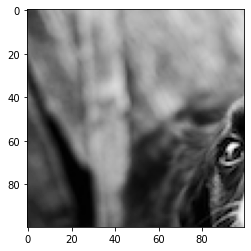

After


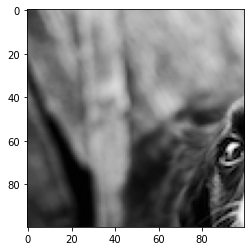

In [2]:

I = plt.imread('./images/dog.png')

if (I.dtype == np.uint8):
    I = I.astype(float) / 256
    
I = np.mean(I, axis=2)

A = I[0:100,0:100]

print("Before")
plt.imshow(A,cmap=plt.cm.gray)
plt.show()   

print("After")
plt.imshow(0.1*A,cmap=plt.cm.gray)
plt.show()

Per the documentation a normalized instance is used to map the data for each pixel to a value between [0, 1] with the smallest value being 0 and the largest being 1 by default. Because of this multiplying all the pixels by 0.1 will not have any effect as we can see in the before and after.

***
**[1.7]**

Write code in the cell below which (a) puts the values of `A` into a singe 10,000-dimensional column vector `x`, (b) sorts the entries in `x`, and (c) visualizes the contents of the sorted vector `x` by using the **matplotlib.pyplot.plot** function


[[0.25      ]
 [0.25      ]
 [0.25      ]
 ...
 [0.95      ]
 [0.95      ]
 [0.95882356]]


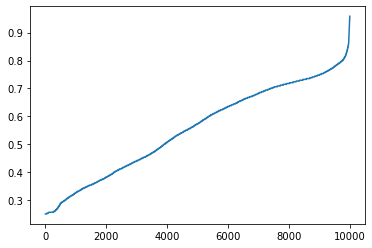

In [3]:
A = I[0:100,0:100]
A = A.flatten()
A = np.sort(A)
A = A.reshape(-1, 1)
print(A)
plt.plot(A)

***

**[1.8]**

Display a figure showing a histogram of the pixel intensities in `A` using **matplotlib.pyplot.hist**. Your histogram should have 16 bins. You will need to convert `A` to a vector in order for the histogram to display correctly (otherwise it will show 16 bars for each row of A)


(array([ 597.,  610.,  833.,  734.,  786.,  559.,  683.,  628.,  866.,
         928., 1462.,  840.,  355.,   86.,   15.,   18.]),
 array([0.25      , 0.29430148, 0.33860296, 0.3829044 , 0.4272059 ,
        0.47150737, 0.5158088 , 0.56011033, 0.6044118 , 0.64871323,
        0.69301474, 0.7373162 , 0.78161764, 0.82591915, 0.8702206 ,
        0.9145221 , 0.95882356], dtype=float32),
 <a list of 16 Patch objects>)

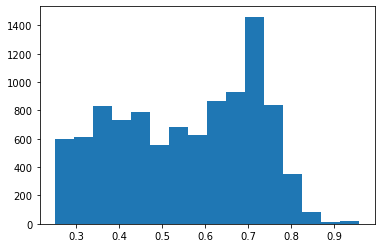

In [4]:
A = I[0:100,0:100]
A = A.flatten()
plt.hist(A, bins=16)

***
**[1.9]** 

Create and display a new (binary) image the same size as `A`, which is white wherever the intensity in `A` is greater than a threshold specified by a variable `t`, and black everywhere else. Experiment in order to choose a value for the threshold which makes the image roughly half-white and half-black. Also print out the percentage of pixels which are black for your chosen threshold.


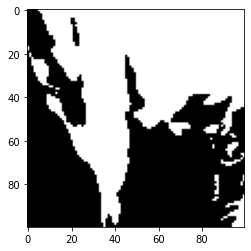

After experimenting: 
50.28 % of Pixels Are Black at threshold 0.574


In [5]:
A = I[0:100,0:100]
t = 0.574
A = np.where(A > t, 1, 0)

plt.imshow(A,cmap=plt.cm.gray)
plt.show()
print("After experimenting: ")
print((np.count_nonzero(A == 0)/(A.size)*100), "% of Pixels Are Black at threshold", t)

***
**[1.10]**

Generate a new grayscale image, which is the same as A, but with A's mean intensity value subtracted from each pixel. After subtracting the mean, set any negative values to 0 and display the result.


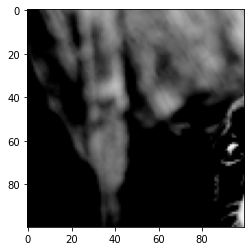

In [6]:
A = I[0:100,0:100]
mean = np.mean(A, axis=(0,1))
A = A - mean
A = np.where(A < 0, 0, A)
plt.imshow(A,cmap=plt.cm.gray)
plt.show()

***
**[1.11]**

Let `y` be a column vector: `y = [1, 2, 3, 4, 5, 6]` so that `y.shape = (6,1)`. Reshape the vector into a matrix `z` using the **numpy.array.reshape** and (**numpy.array.transpose** if necessary) to form a new matrix `z` whose first column is `[1, 2, 3]`, and whose second column is `[4, 5, 6]`. Print out the resulting array `z`



In [7]:
y = [1, 2, 3, 4, 5, 6]
B = np.reshape(y, (-2, 3))
B = np.transpose(B)
print(B)

[[1 4]
 [2 5]
 [3 6]]


***
**[1.12]**

Find the minimum value of `A`, if there are multple entries with the same minimum value it is fine to return the first one.  Set `r` to be the row in which it occurs and `c` to be the column. Print out `r`, `c`, and `A[r,c]`


In [8]:
A = I[0:100,0:100]
result = np.where(A == np.min(A))
coords = list(zip(result[0], result[1]))
r = coords[0][0]
c = coords[0][1]

print("R:", r , " C:", c)
print("A[R][C]", A[r][c])


R: 55  C: 12
A[R][C] 0.25


***
**[1.13]**

Let v be the vector: `v = [1,8,8,2,1,3,9,8]`. Using the unique function, compute and print the total number of unique values that occur in `v`.

In [9]:
v = [1,8,8,2,1,3,9,8]
print(np.unique(v).size)

5


***
# 2. Averaging Images [40pts]

In this exercise you will write code which loads a collection of images (which are all the same size), computes a pixelwise average of the images, and displays the resulting average.

The images below give some examples that were generated by averaging "100 unique commemorative photographs culled from the internet" by Jason Salavon. Your program will do something similar.

￼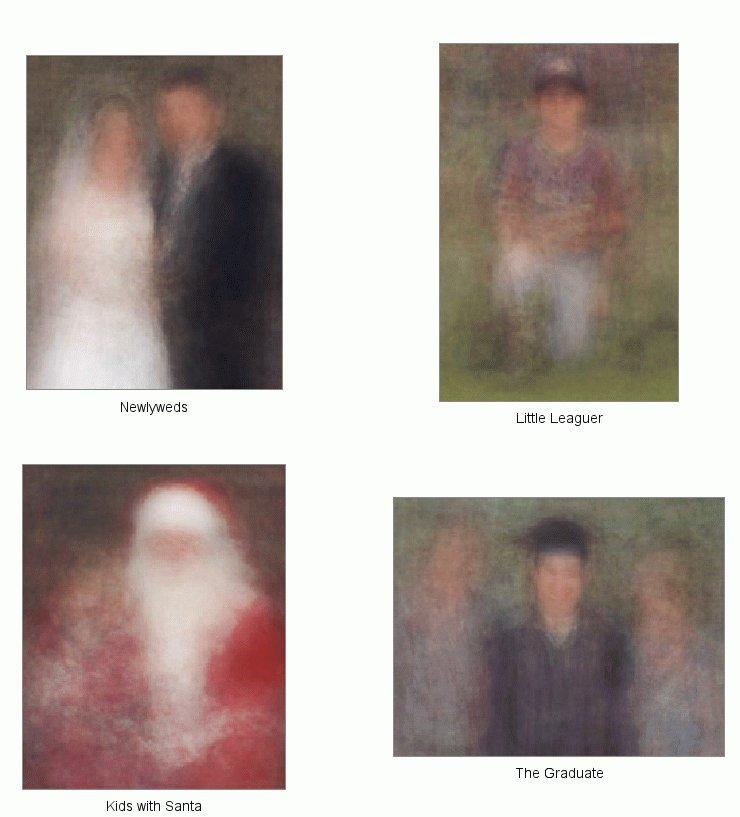


***

Download the images provided on the Canvas course website for this assignment `averageimage_data.zip`. There are two sets, `set1` and `set2`. Notice that they are all the same size within a single set.

***

**[2.1]**

Write a function in the cell below that loads in one of the sets of images and computes their average. You can use the **os.listdir** to get the list of files in the directory. As you load in the images, you should compute an average image on the fly. Color images are represented by a 3-dimensional array of size (HxWx3) where the third dimension indexes the red, green and blue channels. You will want to compute a running average of the red, green and blue slices in order to get your final average color image. 

You should encapsulate your code in a function called **average_image** that takes the image directory as an input and returns the average of the images in that directory. Your function should implement some error checking. Specifically your function should skip over any files in the directory that are not images (**plt.imread** will thrown an **OSError** if the file is not an image). It should ignore images that are not color images. Finally, it should also skip any images which are not the same height and width as the first color image you load in.


In [10]:
#
# these are the only modules needed for problem #2
#
import numpy as np
import os
import matplotlib.pyplot as plt


Error Not and Image


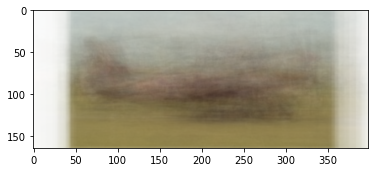

In [11]:
def average_image(dirname):
    """
    Computes the average of all color images in a specified directory and returns the result.
    
    The function ignores any images that are not color images and ignores any images that are not
    the same size as the first color image you load in
    
    Parameters
    ----------
    dirname : str
        Directory to search for images
        
    Returns
    -------
    numpy.array (dtype=float)
        HxWx3 array containing the average of the images found
        
    """

    images = []
    shape = None
    
    for file in os.listdir(dirname):
        filename = os.path.join(dirname,file)
        if os.path.isfile(filename):
            try:            
                I = plt.imread(filename)
                if not shape:
                    shape = I.shape
                else:
                    if I.shape != shape:
                        print("Error image is the wrong shape. Size or color.")
                        continue
                images.append(I)
            except:
                print("Error Not and Image")



    images = np.array(images)
    Iaverage = np.mean(images, axis=(0))/255


    return Iaverage

image = average_image('./averageimage_data/set2')
plt.imshow(image)
plt.show()


***
**[2.2]**

Write code below which calls your **average_image()** function twice, once for each set of images. Display the resulting average images. Also display a single example image from each set for comparison


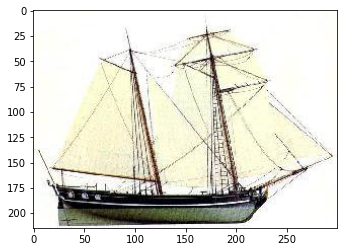

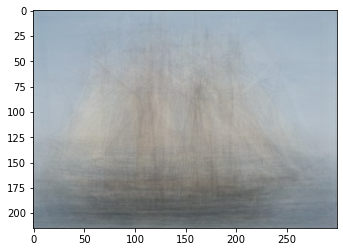

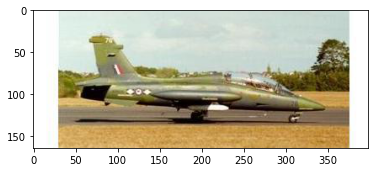

Error Not and Image


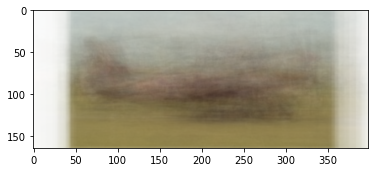

In [12]:

image = plt.imread('./averageimage_data/set1/im01.jpg')
plt.imshow(image)
plt.show()

image = average_image('./averageimage_data/set1')
plt.imshow(image)
plt.show()

image = plt.imread('./averageimage_data/set2/im01.jpg')
plt.imshow(image)
plt.show()

image = average_image('./averageimage_data/set2')
plt.imshow(image)
plt.show()

***
**[2.3]**

Provide a description of the appearance of the average images.  Give an explanation as to why the average image
does not look like the individual example images.

Whilst the result pictures are similar to the singular pictures provided above they do have some differences since they are of course averages of all the pictures in the set. As we can see in the image of the plane in the first image we can see what is obviously a jet in the second image we can also see a plane but we can note some aspects of the averaged pictures as well i.e the propellors and the orientation of the plane as if its about to fly off. We can also note more blurriness in details that are diverse across images such as the tail and color of the runway. Also looking at the boat we can see similaries such as the sails and shape, but we can lso see a differnt backgroun with sky and water highlighting that those a prominent features in the boat images in the dataset. We can also see a bluring of a color of the boat implying that boat colors are quiet diverse in the dataset.

***
# 3. Color sensor demosaicing [40pts]

As discussed in class, there are several steps to transform raw sensor measurements into nice looking images. These steps include Demosaicing, White Balancing and Gamma Correction. In this problem we will implement the demosaicing step. (see Szeliski Chapter 2.3) In the assignment data directory on Canvas there is a zip file containing raw images from a Canon 20D camera as well as corresponding JPEG images from the camera (`*.JPG`). The raw image files (`*.CR2`) have been converted to 16-bit PGM images (`*.pgm`) using David Coffin's dcraw program to make it easy to load them in as arrays using the supplied code below **read_pgm**

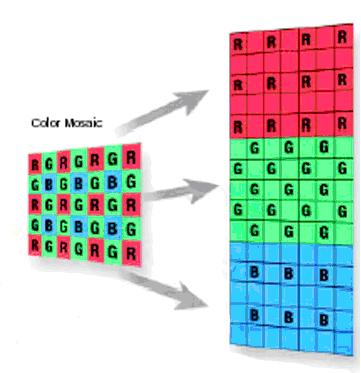

Bayer RGGB mosaic.

The raw image has just one value per pixel. The sensor is covered with a filter array that modifies the sensitivity curve of each pixel. There are three types of filters: "red", "green", and "blue", arranged in the following pattern repeated from the top left corner:

```
R G . . .
G B
.
.
.
```

Your job is to compute the missing color values at each pixel to produce a full RGB image (3 values at each pixel location). For example, for each "green" pixel, you need to compute "blue" and "red" values. Do this by interpolating values from adjacent pixels using the bilinear interpolation scheme we described in class.


In [13]:
#
# these are the only modules needed for problem #3
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import correlate

#
# this function will load in the raw mosaiced data stored in the pgm file
#
def read_pgm(filename):
    """
    Return image data from a raw PGM file as a numpy array
    Format specification: http://netpbm.sourceforge.net/doc/pgm.html
    
    """
    infile = open(filename,'r',encoding="ISO-8859-1")
    
    # read in header
    magic = infile.readline()
    width,height = [int(item) for item in infile.readline().split()]
    maxval = infile.readline()
    
    # read in image data and reshape to 2D array, convert 16bit ints to float
    image = np.fromfile(infile, dtype='>u2').reshape((height, width))
    image = image.astype(float)/65535.
    return image


***
**[3.1]**

Implement a function ``demosaic`` which takes an array representing the raw image and returns a standard color image. To receive full credit, you should implement this using NumPy indexing operations like you practiced in the first part of the assignment. You should not need any for loops over individual pixel locations. You can accomplish this using array subindexing. Alternately with a little thinking, you can implement this using correlation filtering (e.g., **scipy.ndimage.correlate**) with the appropriate choice of filter weights.

In either case you will need to hand some special cases at the boundary of the image where you don't know values outside of the image in order to interpolate (e.g., in the figure above the values of the blue channel on the edges of the image only have 1 or 2 neighbors on one side). For these cases, you should assume that the values just outside the edge of the image are the same as the value at the nearest pixel where a value was measured.


In [14]:
def demosaic(I):
    h = I.shape[0]
    w = I.shape[1]
    Ired = np.zeros(I.shape)
    Igreen = np.zeros(I.shape)
    Iblue = np.zeros(I.shape)
    
    Igreen[1:h:2, 0:w:2] = I[1:h:2, 0:w:2]
    Igreen[0:h:2, 1:w:2] = I[0:h:2, 1:w:2]
    Ired[0:h:2, 0:w:2] = I[0:h:2, 0:w:2]
    Iblue[1:h:2, 1:w:2] = I[1:h:2, 1:w:2]

    weightsGreen = [
                        [0, 1/4, 0], 
                        [1/4, 1, 1/4],
                        [0, 1/4, 0]
                    ]

    weightsBlueOne = [
                        [0, 1/2, 0],
                        [0, 1, 0],
                        [0, 1/2, 0]
                    ]

    weightsBlueTwo = [
                        [1/4, 0, 1/4],
                        [0, 1, 0],
                        [1/4, 0, 1/4]
                    ]

    weightsRedOne = [
                        [0, 0, 0],
                        [1/2, 1, 1/2],
                        [0, 0, 0]
                    ]
    
    weightsRedTwo = [
                        [1/4, 0, 1/4],
                        [0, 1, 0],
                        [1/4, 0, 1/4]
                    ]


    
    IFinalGreen = correlate(Igreen, weightsGreen, mode='mirror')

    

    IFinalBlue = correlate(Iblue, weightsBlueOne, mode='mirror')
    IFinalBlue = correlate(IFinalBlue, weightsBlueTwo, mode='mirror')

    IFinalRed = correlate(Ired, weightsRedOne, mode='mirror')
    IFinalRed = correlate(IFinalRed, weightsRedTwo, mode='mirror')
    
    IFinal = np.dstack((IFinalRed, IFinalGreen, IFinalBlue))
    
    return IFinal

***
**[3.2]**

Write code and comments below that demonstrate the results of your demosaic function using `IMG_1308.pgm`. You are encouraged to include multiple examples for illustration. Since the images are so large, work with just the upper-left 500x500 pixel sub-block for illustrations.

You should display: (a) the original raw image with a grayscale colormap, (b) the resulting RGB image after demosaicing, (c) the corresponding part of the provided JPG file from the camera 


RAW Unproccessed


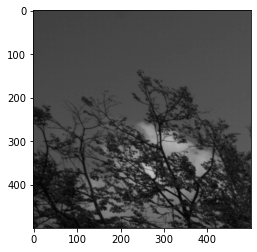

Demosaiced


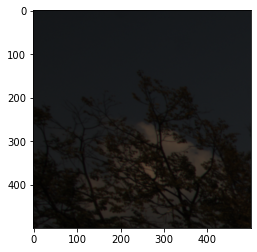

True Image


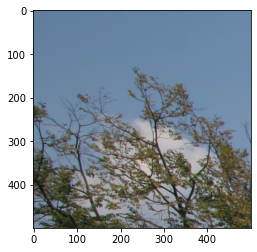

In [15]:
Iraw = read_pgm("demosaic/IMG_1308.pgm")[0:500, 0:500]
image = plt.imread('demosaic/IMG_1308.jpg')[0:500, 0:500]
IFinal = demosaic(Iraw[0:500, 0:500])

print("RAW Unproccessed")
plt.imshow(Iraw, cmap='gray')
plt.show()

print("Demosaiced")
plt.imshow(IFinal)
plt.show()

print("True Image")
plt.imshow(image)
plt.show()

#[enter your code here]


***
**[3.3]**

The correctly demosaiced image will appear darker than the JPG version provided. Provide an explanation of why this is the case based on your reading about the digital camera pipeline.


After demosaicing in the digital camera pipeline the image must go throught a sharpening process as well as have its white balance adjusted which can explain why the freshly demosaiced images appears darker than its JPEG counterpart.